# Neighborhood effects




In [14]:
using Plots
using EmpiricalBayes
using CSV
using DataFrames
using Distributions
using LaTeXStrings
using JLD2
using Nullables
using Random: seed!
using StatsBase

┌ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1186


In [2]:
pgfplots()

Plots.PGFPlotsBackend()

In [2]:
chetty = CSV.read("datasets/chetty_hendren2005.csv", types=Dict(3=>String));

In [3]:
idx = [!ismissing(x) for x in chetty[:p25_coef]]
β_hat = [chetty[i,:p25_coef] for i in findall(idx)]
se_hat = [chetty[i,:p25_se] for i in findall(idx)]
z_scores = β_hat./se_hat;

In [4]:
size(chetty)

(741, 9)

In [4]:
marginal_grid = collect(range(-5,stop=5,length=1001));
prior_grid = collect(range(-3,stop=3,length=121));
marginal_h = marginal_grid[2]-marginal_grid[1];

In [5]:
ds = MixingNormalConvolutionProblem(Normal, 0.2, prior_grid, marginal_grid);

In [6]:
seed!(34) 
Xs = z_scores
n_total = length(Xs)
n_half = ceil(Int, n_total/2)
idx_test = sample(1:n_total, n_half, replace=false)
idx_train = setdiff(1:n_total, idx_test)
Xs_train = Xs[idx_train]
Xs_test = Xs[idx_test];

In [9]:
extrema(Xs_train),extrema(Xs_test)

((-4.25, 3.494769874476988), (-3.5225225225225225, 3.3849607182940518))

In [7]:
xs = Float64.(collect(-3:0.25:3));

In [ ]:
post_mean_cis = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(x))) for x in xs]

25-element Array{CalibratedCI,1}:
 CalibratedCI(-0.03357985990783334, MinimaxCalibrator(BinnedCalibrator([-5.0, -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92, -4.91  …  4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.0], 0.009999999999999787, [-0.255783, -0.261032, -0.26636, -0.271769, -0.27726, -0.282831, -0.288485, -0.29422, -0.300039, -0.30594  …  0.0688683, 0.0676091, 0.0663667, 0.0651408, 0.0639315, 0.0627387, 0.0615622, 0.0604021, 0.0592581, 0.0581303], -0.39426681649204876), 0.02354403744924269, 0.07956873376721502, [2.53986e-5, 2.61784e-5, 2.69795e-5, 2.78025e-5, 2.86479e-5, 2.9516e-5, 3.04076e-5, 3.13231e-5, 3.22631e-5, 3.32281e-5  …  7.85821e-5, 7.71453e-5, 7.57276e-5, 7.43288e-5, 7.29489e-5, 7.15879e-5, 7.02455e-5, 6.89217e-5, 6.76164e-5, 6.63294e-5], [0.000317258, 0.000324027, 0.000330908, 0.000337904, 0.000345013, 0.000352239, 0.000359581, 0.000367042, 0.000374621, 0.000382319  …  2.50106e-10, 2.3708e-10, 2.24712e-10, 2.12968e-10, 2.01819e-10, 1.91235e-10,

In [18]:
JLD2.@save "chetty_post_mean_Dec18.jld2" post_mean_cis

In [ ]:
lfsr_cis = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(LFSRNumerator(x))) for x in xs];

In [20]:
lfsr_cis

UndefVarError: UndefVarError: lfsr_cis not defined

In [13]:
left_ci_post_mean_nb_cb = [t[1].ci_left for t in post_mean_nb_cb]
right_ci_post_mean_nb_cb  =  [t[1].ci_right for t in post_mean_nb_cb]
point_est_post_mean_nb_cb  = [t[1].calibrated_target for t in post_mean_nb_cb];

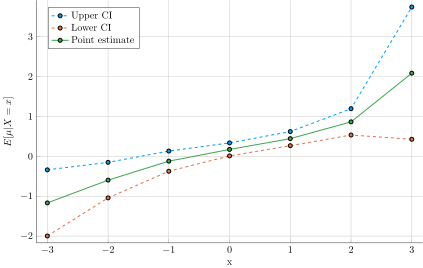

In [15]:
plot(xs, [right_ci_post_mean_nb_cb left_ci_post_mean_nb_cb point_est_post_mean_nb_cb],
     marker=([:hex :d]), label=["Upper CI" "Lower CI" "Point estimate"], 
     line=([:dash :dash :solid]), xlabel="x", ylabel=L"E[\mu | X=x]", legend=:topleft)

In [45]:
lfsr_nb = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(LFSRNumerator(x))) for x in xs];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [52]:
left_ci_lfsr_nb = clamp.([t[1].ci_left for t in lfsr_nb],0,1)
right_ci_lfsr_nb  =  clamp.([t[1].ci_right for t in lfsr_nb],0,1)
point_est_lfsr_nb  = clamp.([t[1].calibrated_target for t in lfsr_nb],0,1);

In [55]:
yuma_x = -0.216/0.172

-1.255813953488372

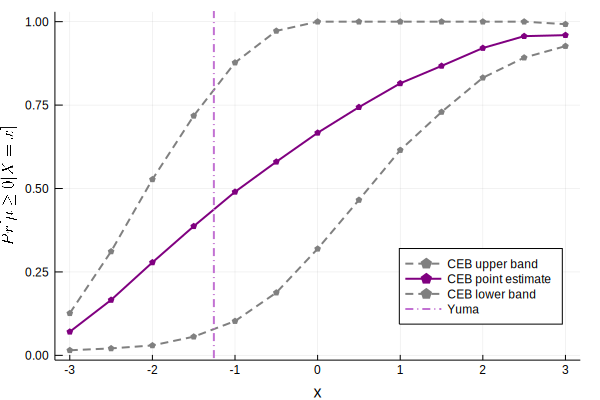

In [62]:
chetty_lfsr_bands = Plots.plot(xs, [right_ci_lfsr_nb  point_est_lfsr_nb  left_ci_lfsr_nb],
     label=["CEB upper band" "CEB point estimate" "CEB lower band"], 
     markershape=[:pentagon :pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:grey :purple :grey], linewidth=2,
     line=([:dash :solid :dash]), xlabel="x",ylabel=L"Pr[\mu \geq 0| X=x]",
     legend=:bottomright)
vline!([yuma_x], linewidth=2, label="Yuma", line=(:dashdot))

In [63]:
savefig(chetty_lfsr_bands, "chetty_lfsr_bands.pdf")

In [65]:
max_bias_contrib = [t[1].max_bias for t in lfsr_nb];
std_contrib = [t[1].std for t in lfsr_nb];


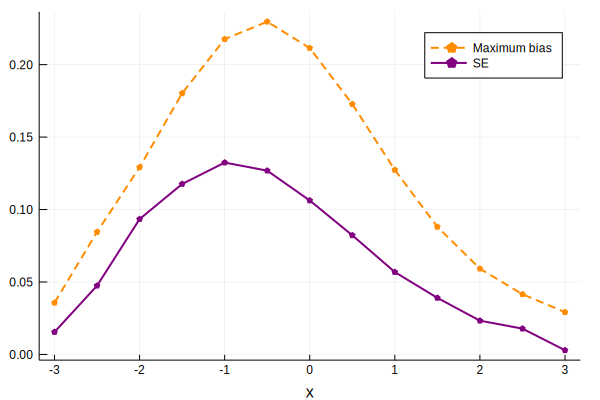

In [69]:
chetty_bias_var = Plots.plot(xs, [max_bias_contrib  std_contrib],
     label=["Maximum bias" "SE"], 
     markershape=[:pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:darkorange :purple], linewidth=2,
     line=([:dash :solid]), xlabel="x")

In [70]:
savefig(chetty_bias_var, "chetty_bias_var.pdf")